<a href="https://colab.research.google.com/github/advitiya7/UAS-DTU/blob/main/uas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time



In [ ]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) # torch.utils.data this represents a python iterable over a dataset along with many features
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

iterable represents an objects which can be looped over and over


In [ ]:
dataiter = iter(trainloader) 
images, labels = dataiter.next()
print(type(images))
print(images.shape) # batch size of 1 with 64 images each and the size of the image is 28X28
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


dataiter is a variable we have called the iter function on trainloader as it can be iterated over and over it cn be compared to a for loop and by calling the .next() we are increasing the value till the number 64 is reached as it is the batch size


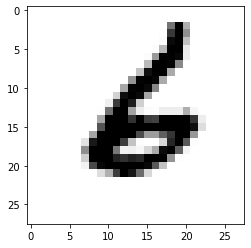

In [ ]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

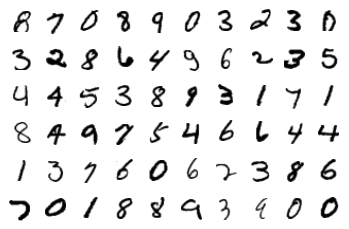

In [ ]:
# here we are exploring our dataset
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

this is a dataset with 6 rows and 10 colums we have plotted this using matlibplot and used a for loop for printing in repetition 


In [ ]:
# here our neural network is being defined

from torch import nn # importing neural net 
# Layer details for the neural network
input_size = 784 # As our image is of size 28X28
hidden_sizes = [128, 64] # two hidden layers with 128 & 64 neurons respectively
output_size = 10 # contains the number from 0 to 9

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


Here we have used the sequential container which will store our first hidden layers i.e of 128 nodes and then we use ReLU function on the weighted sums of the hidden layer we have avoided sigmoid as vanishing of gradient problem arises with it and also ReLU are faster as compared to the sigmoid
We have used the logsoftmax function for our output layers so as to turn them into a vector of probablities.
we have used the sequential module of nn it process the code in the given order

> Indented block



In [ ]:
criterion = nn.NLLLoss() # this is a loss function mainly used for multi-classifier task
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)
print('Before backward pass: \n', model[0].weight.grad) # this the wieghts in our tensor before taking the gradient

loss.backward() # this takes the partial derivative of the output w.r.t the input variables

print('After backward pass: \n', model[0].weight.grad) # this is after taking the gradient of weights of  each layer

Before backward pass: 
 tensor([[ 0.0047,  0.0047,  0.0047,  ...,  0.0047,  0.0047,  0.0047],
        [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
        [ 0.0072,  0.0072,  0.0072,  ...,  0.0072,  0.0072,  0.0072],
        ...,
        [-0.0053, -0.0053, -0.0053,  ..., -0.0053, -0.0053, -0.0053],
        [ 0.0016,  0.0016,  0.0016,  ...,  0.0016,  0.0016,  0.0016],
        [-0.0047, -0.0047, -0.0047,  ..., -0.0047, -0.0047, -0.0047]])
After backward pass: 
 tensor([[ 0.0038,  0.0038,  0.0038,  ...,  0.0038,  0.0038,  0.0038],
        [ 0.0008,  0.0008,  0.0008,  ...,  0.0008,  0.0008,  0.0008],
        [ 0.0125,  0.0125,  0.0125,  ...,  0.0125,  0.0125,  0.0125],
        ...,
        [-0.0032, -0.0032, -0.0032,  ..., -0.0032, -0.0032, -0.0032],
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        [-0.0028, -0.0028, -0.0028,  ..., -0.0028, -0.0028, -0.0028]])


In [ ]:
from torch import optim # this is a package containing various optimization variables

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.5, momentum=0.5) # here SGD refers to stochastic gradient descent
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward() # calculation of the gradients
print('Gradient -', model[0].weight.grad)
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight) # here the weights are optimized by backward propagation

Initial weights -  Parameter containing:
tensor([[ 0.0270, -0.0207, -0.0120,  ...,  0.0217,  0.0278, -0.0100],
        [ 0.0294, -0.0298, -0.0202,  ..., -0.0038,  0.0352,  0.0301],
        [ 0.0182, -0.0336,  0.0255,  ..., -0.0191,  0.0091, -0.0247],
        ...,
        [-0.0220,  0.0071,  0.0010,  ...,  0.0115, -0.0069,  0.0176],
        [-0.0335, -0.0141,  0.0133,  ..., -0.0119,  0.0265,  0.0212],
        [-0.0223,  0.0247,  0.0211,  ...,  0.0073, -0.0178, -0.0221]],
       requires_grad=True)
Gradient - tensor([[ 0.0033,  0.0033,  0.0033,  ...,  0.0033,  0.0033,  0.0033],
        [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
        [ 0.0027,  0.0027,  0.0027,  ...,  0.0027,  0.0027,  0.0027],
        ...,
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        [ 0.0050,  0.0050,  0.0050,  ...,  0.0050,  0.0050,  0.0050],
        [ 0.0020,  0.0020,  0.0020,  ...,  0.0020,  0.0020,  0.0020]])
Updated weights -  Parameter containing:
tensor([[ 0.

SGD is a optimizing method unlike the orignal grdient descent it does not iterate over the whole data set but chooses a random dataset to iterate over to improve the function with the help of learning rate

In [ ]:
# this is the trainning part of our neural network
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward() 
         
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item() # loss.item contains the entire loss of the mini batch
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader))) # runningloss/the entire batch size
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.056922029736124154
Epoch 1 - Training loss: 0.047245103080865186
Epoch 2 - Training loss: 0.04491450014521183
Epoch 3 - Training loss: 0.0410665152275484
Epoch 4 - Training loss: 0.03711540043018441
Epoch 5 - Training loss: 0.03568811470747931
Epoch 6 - Training loss: 0.03325346132295071
Epoch 7 - Training loss: 0.03057188467658274
Epoch 8 - Training loss: 0.02894526820898906
Epoch 9 - Training loss: 0.0259643360360045
Epoch 10 - Training loss: 0.0248311042764794
Epoch 11 - Training loss: 0.023031447081640958
Epoch 12 - Training loss: 0.021574799308808013
Epoch 13 - Training loss: 0.02007734613709781
Epoch 14 - Training loss: 0.018852491979332104

Training Time (in minutes) = 3.688238227367401


Predicted Digit = 1


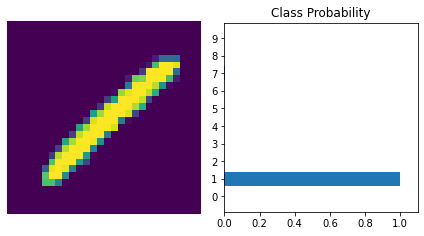

In [ ]:

def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()
    images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [ ]:
# this is model evaluation
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9771
